In [2]:
import pandas as pd
import numpy as np
from modelling.sklearn_dataload import DataPrep
from modelling.sklearn_pipeline import Pipeline, model_exec, IDENTITY_COLUMNS
from dataprep.data_prep import TextPrep
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
grid = {
            'LR': {
                'type': LogisticRegression(solver='liblinear'),
                'grid': {
                    'penalty': ['l1','l2'], 
                    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
                    }
                },
            'NB': {
                'type': MultinomialNB(),
                'grid': {
                    'alpha' : [1.0, 0.1, 0.01]
                }
            },
            'RF': {
            'type': RandomForestClassifier(n_estimators=50, n_jobs=-1),
            'grid': {
                'n_estimators': [10,100], 
                'max_depth': [5,50], 
                'max_features': ['sqrt','log2'],
                'min_samples_split': [2,10]
            }
        }  
}

run_type = 'build'
scoring = 'auc-roc'
sample_pct = 5
score_k_val = 50

In [4]:
TRAIN = '../dataset/train.csv'

In [5]:
dp = DataPrep(text_col='comment_text', label_col='target')
tp = TextPrep()

In [6]:
print('LOADING {}% OF DATA'.format(sample_pct))
df = dp.load_data(TRAIN, ['target'], sample_pct, 1234)
df = dp.binarize_label(df, 0.5)
text = dp.get_text(df)
print('DATASET LEN: {}'.format(len(df)))

print('SPLITTING INTO X, y')
X, y = dp.split_X_y(df)

print('PRELIMINARY TEXT PROCESSING')
clean_data = text.apply(tp.clean, rm_caps=True, map_punct=True, cl_special=True, 
                        sp_check=False, replace_id=True, rm_stop=False, 
                        stem=True, mp_contract=True)

LOADING 5% OF DATA
LOADING FEATURE STAGING DATA
DATASET LEN: 90244
SPLITTING INTO X, y
PRELIMINARY TEXT PROCESSING


In [7]:
print('CREATING TFIDF FEATURES')
tfidf = dp.create_text_feats(clean_data, 'tfidf', ngram_range=(1,3), max_features=10000)

print('JOINING TFIDF FEATURES')
X = dp.join_features(X, tfidf)

print('SPLITTING INTO TRAIN AND TEST')
X_train, X_test, y_train, y_test = dp.train_test_split(X, y, test_size=.2, train_size=.8, random_state=1234, stratify=None)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

CREATING TFIDF FEATURES
JOINING TFIDF FEATURES
droppingxx
SPLITTING INTO TRAIN AND TEST
(72195, 9999) (18049, 9999) (72195,) (18049,)


In [8]:
iteration_name = 'id_repl_5pct_auc_roc'
model_exec(run_type, iteration_name, grid, 
           scoring, score_k_val, X_train, y_train, X_test, y_test)

The path of the model object used for this run is found at 
models_store
The scoring function used for this run is: auc-roc
The probabilistic threshold at which the score is calculated is 50
The parameter grid used for the search is: 
{'LR': {'type': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False), 'grid': {'penalty': ['l1', 'l2'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]}}, 'NB': {'type': MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), 'grid': {'alpha': [1.0, 0.1, 0.01]}}, 'RF': {'type': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
     

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


TEST PRECISION AT 50: 0.0
TEST RECALL AT 50: 0.0
TEST ACCURACY AT 50: 0.9442628400465399
AUC ROC: 0.8604414701721025
CONFUSION MATRIX:
   pred_neg  pred_pos
0     17043         0
1      1006         0
USING SCORING FUNCTION: make_scorer(auc_roc)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) {'alpha': [1.0, 0.1, 0.01]}
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1.0, 0.1, 0.01]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=make_scorer(auc_roc),
       verbose=0)
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
0.5182073269808414
models_store
/Users/hyeyeonchang/Documents/Spring2019/machine_learning/DetoxiPy/src
MODEL STORED AT models_store/id_repl_5pct_auc_roc_NB_2019-06-06 08:21:05.661565.joblib
TESTING SELECTED

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


TEST PRECISION AT 50: 0.0
TEST RECALL AT 50: 0.0
TEST ACCURACY AT 50: 0.9442628400465399
AUC ROC: 0.8156453522017574
CONFUSION MATRIX:
   pred_neg  pred_pos
0     17043         0
1      1006         0
USING SCORING FUNCTION: make_scorer(auc_roc)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) {'n_estimators': [10, 100], 'max_depth': [5, 50], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 10]}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
        

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
print('LOADING {}% OF DATA'.format(sample_pct))
df = dp.load_data(TRAIN, ['target'], sample_pct, 1234)
df = dp.binarize_label(df, 0.5)
text = dp.get_text(df)
print('DATASET LEN: {}'.format(len(df)))

print('SPLITTING INTO X, y')
X, y = dp.split_X_y(df)

In [10]:
# import os
# os.listdir('models_store/')

In [11]:
nb_path = 'id_repl_5pct_auc_roc_NB_2019-06-06 08:21:05.661565.joblib'
lr_path = 'id_repl_5pct_auc_roc_LR_2019-06-06 08:18:54.992504.joblib'
rf_path = 'id_repl_5pct_auc_roc_RF_2019-06-06 09:03:23.762488.joblib'

In [12]:
rf = Pipeline('load', grid_model_id_key=None, 
              X_train=None, y_train=None,
              clf_grid=None, model_obj_pref=None, 
              scoring=None, threshold=None, 
              model_obj_path=rf_path)

models_store/id_repl_5pct_auc_roc_RF_2019-06-06 09:03:23.762488.joblib


In [13]:
rf_words = rf.word_importances(X_train)

In [14]:
rf_words[-20:]

array(['silli', 'the', 'useless', 'ignor', 'garbag', 'liar', 'disgust',
       'an idiot', 'hypocrit', 'ridicul', 'crap', 'people', 'damn', 'ass',
       'dumb', 'fool', 'loser', 'moron', 'idiot', 'stupid'], dtype=object)

In [15]:
print('LOADING IN DATA WITH ID COLUMNS FOR EVALUATION')
df = dp.load_data(TRAIN, IDENTITY_COLUMNS + ['target'], sample_pct, 1234)
df = dp.binarize_label(df, 0.5)
print('SPLITTING INTO X, y')
X, y = dp.split_X_y(df)
_, X_eval, _, y_eval = dp.train_test_split(X, y, test_size=.2, train_size=.8, random_state=1234, stratify=None)
X_eval = X_eval.apply(lambda x: x>0.5)

LOADING IN DATA WITH ID COLUMNS FOR EVALUATION
LOADING FEATURE STAGING DATA
SPLITTING INTO X, y


In [16]:
scores = rf.evaluate_bias(X_test, X_eval, y_eval, 0.5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samp

In [17]:
scores

,identity,precision_at_k,recall_at_k,accuracy_at_k,f1_at_k,auc_roc
0,overall,0.914286,0.095427,0.949083,0.172817,0.821069
1,male,1.000000,0.088889,0.896465,0.163265,0.783602
2,female,0.000000,0.000000,0.892562,0.000000,0.738441
3,homosexual_gay_or_lesbian,1.000000,0.037037,0.752381,0.071429,0.762346
4,christian,0.000000,0.000000,0.919481,0.000000,0.748685
5,jewish,0.000000,0.000000,0.928571,0.000000,0.870769
6,muslim,0.000000,0.000000,0.841410,0.000000,0.694372
7,black,1.000000,0.048780,0.751592,0.093023,0.609651
8,white,1.000000,0.041667,0.826415,0.080000,0.699885
9,psychiatric_or_mental_illness,1.000000,0.250000,0.931818,0.400000,0.762500


In [30]:
rf.confusion_matrix(y_test, rf.gen_pred_probs(X_test), .5)

,pred_neg,pred_pos
0,17034,9
1,910,96


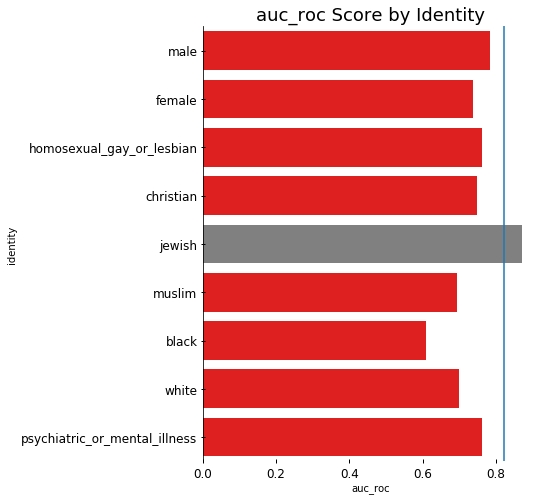

In [33]:
rf.plot_bias(scores, 'auc_roc')

In [19]:
lr = Pipeline('load', grid_model_id_key=None, 
              X_train=None, y_train=None,
              clf_grid=None, model_obj_pref=None, 
              scoring=None, threshold=None, 
              model_obj_path=lr_path)

models_store/id_repl_5pct_auc_roc_LR_2019-06-06 08:18:54.992504.joblib


In [22]:
lr_words = lr.word_importances(X_train)
lr_words[-20:]

array(['jerk', 'of the word', 'assum that', 'suck', 'ignor', 'silli',
       'loser', 'ass', 'foolish', 'garbag', 'damn', 'fool', 'ridicul',
       'moron', 'crap', 'dumb', 'hypocrit', 'pathet', 'stupid', 'idiot'],
      dtype=object)

In [23]:
lr.confusion_matrix(y_test, lr.gen_pred_probs(X_test), .5)

,pred_neg,pred_pos
0,16712,331
1,584,422


In [24]:
lr_scores = lr.evaluate_bias(X_test, X_eval, y_eval, 0.5)
lr_scores

,identity,precision_at_k,recall_at_k,accuracy_at_k,f1_at_k,auc_roc
0,overall,0.560425,0.419483,0.949305,0.479818,0.860441
1,male,0.440000,0.488889,0.871212,0.463158,0.800443
2,female,0.525000,0.411765,0.898760,0.461538,0.800752
3,homosexual_gay_or_lesbian,0.588235,0.370370,0.771429,0.454545,0.786325
4,christian,0.400000,0.333333,0.909091,0.363636,0.793897
5,jewish,0.166667,0.200000,0.871429,0.181818,0.756923
6,muslim,0.379310,0.305556,0.810573,0.338462,0.754654
7,black,0.478261,0.268293,0.732484,0.343750,0.628680
8,white,0.491525,0.604167,0.815094,0.542056,0.831701
9,psychiatric_or_mental_illness,0.750000,0.750000,0.954545,0.750000,0.868750


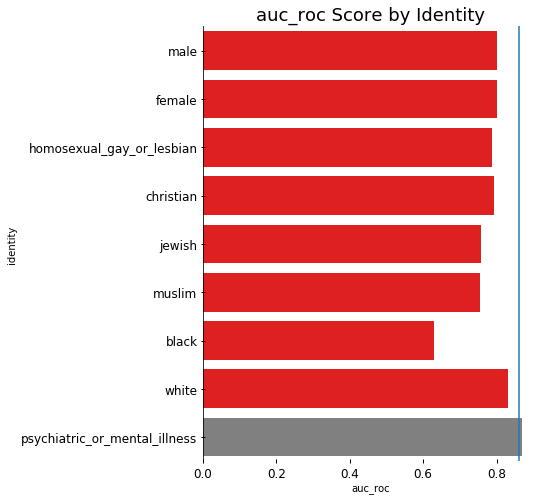

In [32]:
lr.plot_bias(lr_scores, 'auc_roc')

In [26]:
nb = Pipeline('load', grid_model_id_key=None, 
              X_train=None, y_train=None,
              clf_grid=None, model_obj_pref=None, 
              scoring=None, threshold=None, 
              model_obj_path=nb_path)

models_store/id_repl_5pct_auc_roc_NB_2019-06-06 08:21:05.661565.joblib


In [27]:
nb_scores = nb.evaluate_bias(X_test, X_eval, y_eval, 0.4)
nb_scores

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,identity,precision_at_k,recall_at_k,accuracy_at_k,f1_at_k,auc_roc
0,overall,0.897059,0.060636,0.947255,0.113594,0.815645
1,male,0.857143,0.133333,0.898990,0.230769,0.804938
2,female,1.000000,0.078431,0.902893,0.145455,0.797537
3,homosexual_gay_or_lesbian,0.000000,0.000000,0.733333,0.000000,0.773029
4,christian,0.666667,0.066667,0.924675,0.121212,0.836056
5,jewish,0.000000,0.000000,0.914286,0.000000,0.627692
6,muslim,0.666667,0.055556,0.845815,0.102564,0.720622
7,black,0.800000,0.097561,0.757962,0.173913,0.698907
8,white,0.777778,0.145833,0.837736,0.245614,0.762769
9,psychiatric_or_mental_illness,0.000000,0.000000,0.909091,0.000000,0.900000


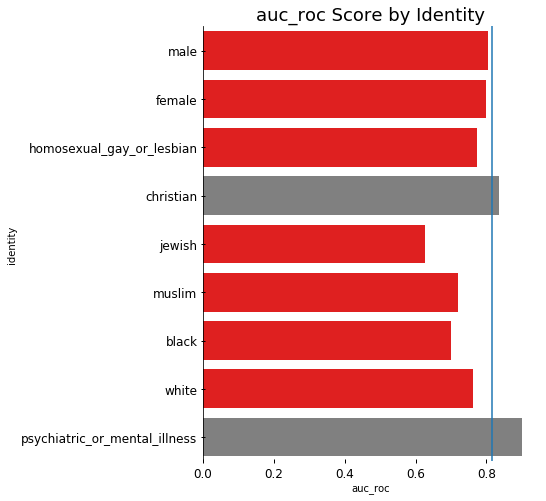

In [31]:
nb.plot_bias(nb_scores, 'auc_roc')

In [29]:
nb.confusion_matrix(y_test, nb.gen_pred_probs(X_test), .5)

,pred_neg,pred_pos
0,17041,2
1,976,30
